# Boston Housing Case Scenario Project  
Statistics for Data Science <br>
Matthew Archer <br>


### Task 1: Understand the data
Before analyzing and visualizing the data and developing insights, the relevant libraries need to be imported, the data has to be loaded into a Dataframe, and an initial review of the data and it's contents need to be conducted. These initial tasks are executed in the following code. 

Furthermore, here is a list of the definitions of each column in the dataset:          <br>
·      CRIM - per capita crime rate by town<br>
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
·      INDUS - proportion of non-retail business acres per town.<br>
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
·      NOX - nitric oxides concentration (parts per 10 million)<br>
·      RM - average number of rooms per dwelling<br>
·      AGE - proportion of owner-occupied units built prior to 1940<br>
·      DIS - weighted distances to five Boston employment centres<br>
·      RAD - index of accessibility to radial highways<br>
·      TAX - full-value property-tax rate per $10,000<br>
·      PTRATIO - pupil-teacher ratio by town<br>
·      LSTAT - % lower status of the population<br>
·      MEDV - Median value of owner-occupied homes in $1000's<br>

In [2]:
#import relevant libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [3]:
#read the data into a dataframe 
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [4]:
#explore the data 
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.shape

(506, 14)

In [7]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

### Task 1 Response 

The dataset that is provided has 508 rows of data with 12 independent variables and one dependent variable: the median house value for various towns within the Boston Metropolitan area. 

### **Task 2: Data Visualization**

For this task a number of visualizations were generated from the housing data to illustrate the distributions of the variables and any relationships among them. The python code used to generate each visualization along with a description can be found below. 

#### Visualization 1 
*For the "Median value of owner-occupied homes" provide a boxplot*

[Text(0.5, 0, 'Median Home Value\n(Thousands USD)'),
 Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')]

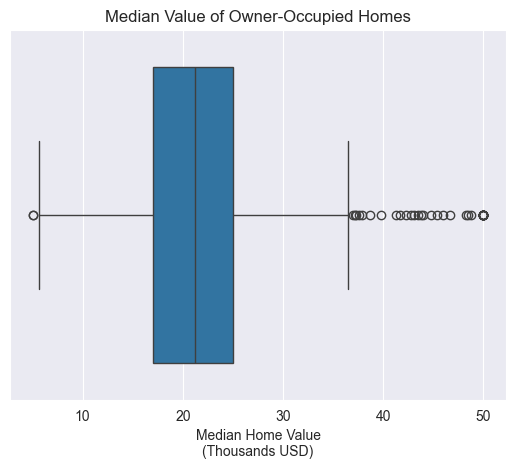

In [8]:
#create a boxplot using the MEDV column 
sns.set_style("darkgrid")
sns.boxplot(boston_df, x = 'MEDV').set(xlabel = 'Median Home Value'+'\n'+'(Thousands USD)', title = 'Median Value of Owner-Occupied Homes')


#### Visualization 1 Review 
This visualization is a box plot of all the median home values that illustrates the bredth and range of each quartile and identifies the median and any outliers. In particular, this visualization shows that although the median of the median home values is just above $20,000, there are a significant number of outliers on the higher end and that the overall distribution skews to higher home values. 

#### Visualization 2
*Provide a  bar plot for the Charles river variable*

In [9]:
#isolate the field with the Charles River Variable and change the values in the column. 
CharlesRiver_df = boston_df[['CHAS']]
CharlesRiver_df = CharlesRiver_df.replace({0.0: "Not Bounded", 1.0: "Bounded"})



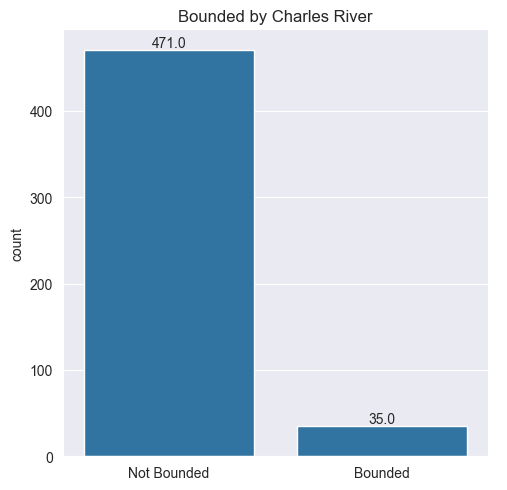

In [10]:
sns.set_style("darkgrid" )
g = sns.catplot(CharlesRiver_df, x = 'CHAS', kind= 'count').set(xlabel='', title= 'Bounded by Charles River')
ax = g.facet_axis(0, 0)  

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Visualization 2 Review 
The second visual illustrates the count of towns in the Boston Metropolitan area that are either bounded or not bounded by the Charles River. Per the illustration, 35 (6.9%) census tracts were bound by the Charles Rver and 471 (93.1%) were not.

#### Visualization 3 
*Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)*

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
35-70%,128.0,24.947656,6.969370,10.2,20.675,22.6,27.425,50.0
<=35%,91.0,27.775824,7.638198,17.1,23.050,24.8,31.150,50.0
>=70%,287.0,19.793380,9.515375,5.0,13.800,18.2,22.550,50.0


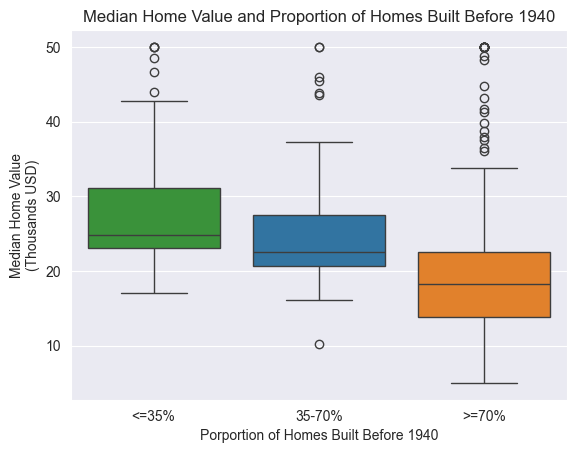

In [11]:
# Create an "Age Group" column that seperates the data into the three percentage groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<=35%'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>=70%'
#Create the boxplots using seaborn where the x axis are the age categories and the y axis is the median home value in thousands USD. 
ax = sns.boxplot(
    x='age_group', 
    y='MEDV', 
    hue = 'age_group',
    data = boston_df, 
    order = ['<=35%', '35-70%', '>=70%']
    ).set(
        xlabel='Porportion of Homes Built Before 1940', 
        ylabel = 'Median Home Value' + '\n' + '(Thousands USD)', 
        title = 'Median Home Value and Proportion of Homes Built Before 1940')
ax

boston_df.groupby('age_group').MEDV.describe().sort_values(by = 'age_group')

#### Visualization 3 Review 
The above visualization provides an illustration of the relationship between the porportion of homes built prior to 1940 and the median home value. When comparing the distributuion ofhome values between each age group, the following becomes apparant: <br>
 - The median home value decreases as the share of older homes increases. <br>
 - The distribution of home values widens as the share of older homes increase. <br>
 - In all three groups the distribution of values skewed to the higher ended.<br>


#### Visualization 4
*Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?*

[Text(0, 0.5, 'Nitric Oxide Concentration (PPM)'),
 Text(0.5, 0, 'Porportion Non-Retail Business Acres'),
 Text(0.5, 1.0, 'Relationship between the Proportion Non-Retail Business Acres\nand Nitric Oxide Concentrations')]

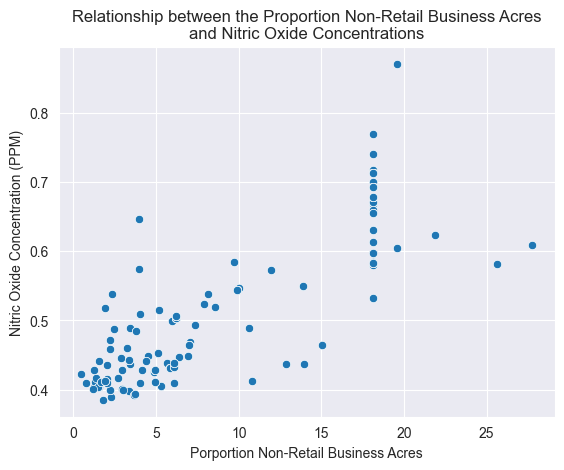

In [12]:
# We first plot the scatter plot 
ax = sns.scatterplot(
    y = 'NOX'
    ,x = 'INDUS'
    ,data = boston_df
).set(
    ylabel = 'Nitric Oxide Concentration (PPM)'
    ,xlabel = 'Porportion Non-Retail Business Acres'
    ,title = 'Relationship between the Proportion Non-Retail Business Acres'+ '\n'+ 'and Nitric Oxide Concentrations'
)
ax

#### Visualization 4 Review<br>
The visualization above is a scatterplot illustrating the relationship between the porportion of non-retail business acres and Nitric Oxide concentrations measured in parts per million (PPM). When looking at the relationship between the two variables there seems to be a positive correlation between the poportion of non-retail business acres and the concentrations of Nitric Oxides that flattens out at a Nitric Oxide concentration of 0.6 PPM.<br><br>
Furthermore, a noticible number of towns have porportion of non-retail business acres around 18% and among those the concentrations exceed 0.6 ppm. This is possibly due to those towns having older non-retail commercial acreaege and thus longer exposure to Nitric Oxide and also being towns that once had far more non-retail commercial acreage that has since been converted to either retail or residential. 

#### Visualization 5 
*Create a histogram for the pupil to teacher ratio variable*


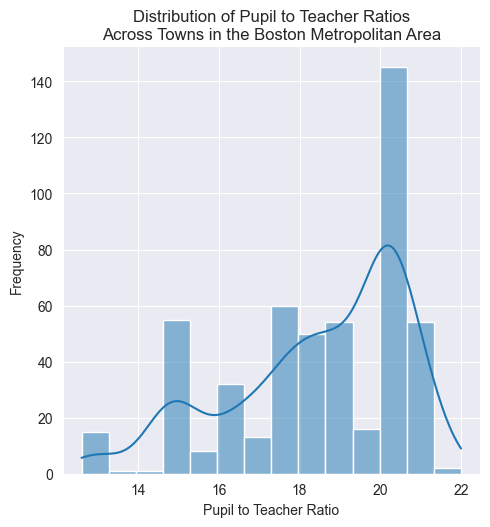

In [13]:
ax = sns.displot(
    boston_df['PTRATIO']
    ,kde = True
).set(
    xlabel = 'Pupil to Teacher Ratio'
    ,ylabel = 'Frequency'
    ,title = 'Distribution of Pupil to Teacher Ratios' + '\n'+ 'Across Towns in the Boston Metropolitan Area'
)

#### Visualization 5 Review<br>
The visualization above illustrates the distribution of pupil to teacher ratios across towns in the Boston Metropolitan Area. The ratios range from 12.6 to 22 pupils per teacher and the overall distribution skews to the right with the most frequent ratio bin being betwen 20 and 21 pupils per teacher. 

### **Task 3: Statistical Tests**

#### Test 1 
*Is there a significant difference in median value of houses bounded by the Charles river or not?*

In this question, the independent variable is whether or not the home is bounded by the Charles River and the depenedent variable is the median value of the home. Therefore, our hypotheses are as follows: 
* $H_0: µ_1 = µ_2$ ("there is no difference in home values between the bounded and unbounded")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in home values between the bounded and unbounded")

Since the independent variable is cateogrical and the dependent variable is continuous, a t-test can be used to test this hypothesis. However, before the t-test can be executed, two assumptions need to be verified: 
1. The distribution of the home values is normal. 
2. Homogeneity of variance between the two categories. 


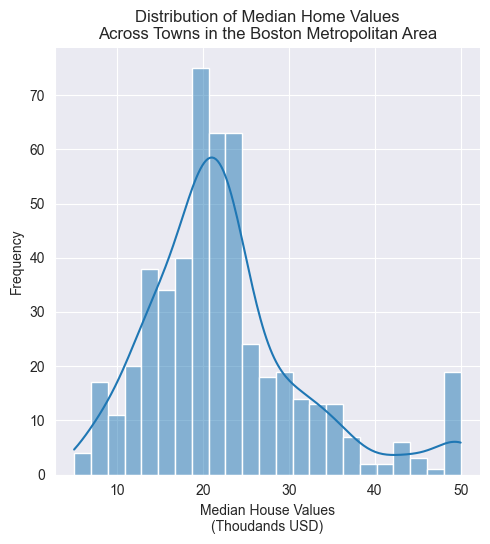

In [14]:
# Determine if the distibution of the home values is normal 
ax = sns.displot(
    boston_df['MEDV']
    ,kde = True
).set(
    xlabel = 'Median House Values'+'\n'+'(Thoudands USD)'
    ,ylabel = 'Frequency'
    ,title = 'Distribution of Median Home Values' + '\n'+ 'Across Towns in the Boston Metropolitan Area'
)

In [15]:
# Levene's Test will be used to determine homogeneity of variance. 
boston_df['CHAS2'] = boston_df['CHAS'].replace({0.0: "Not Bounded", 1.0: "Bounded"})
scipy.stats.levene(boston_df[boston_df['CHAS2'] == 'Not Bounded']['MEDV'],
                   boston_df[boston_df['CHAS2'] == 'Bounded']['MEDV'], center='mean')


LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

The distribution plot above illutrates the normal distribution of the nmedian house values. Therefore the first assumption is met. As for the second assumption, when the Levene test was executed to determine the homogenity of the variances between the two groups of the independent variable, the pvalue was less than 0.05, thus the variances are not equal. However, this should not stop us from conducting the t-test as there are t-tests that exist in cases where there is no homogeneity in the variances. Please see below for the code used to conduct the t-test. 

In [16]:
#Conduct t-test with no homogenity in the variances 
scipy.stats.ttest_ind(boston_df[boston_df['CHAS2'] == 'Not Bounded']['MEDV'],
                   boston_df[boston_df['CHAS2'] == 'Bounded']['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(-3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

**Conclusion**
Since the pvalue (0.0036) is less than 0.05, we reject the null hypothesis. 

#### Test 2
*Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?*

In this problem statement, the independent variable is the porportion of owner occupied unites built prior to 1940 discretized into three groups (<=35%, 35-70%, and >=70%) and the dependent variable is the median values of houses.  Since thee question is asking to determine if there is a difference between the home values among the three groups, the hypotheses to be tested are as follows: 
* $H_0: µ_1 = µ_2 = µ_3$ (There is no difference in the median value of homes among the three groups)
* $H_1:$ The median value differs for atleast one group 
Since the independent variable is categorical with more than 2 categories and the dependent variable is continuous, we will use ANOVA to test these hypotheses. 


In [17]:
#test for equality of variance 
scipy.stats.levene(boston_df[boston_df['age_group'] == '<=35%']['MEDV'],
                   boston_df[boston_df['age_group'] == '35-70%']['MEDV'], 
                   boston_df[boston_df['age_group'] == '>=70%']['MEDV'], 
                   center='mean')

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

Since the pvalue from the Levene test (0.063) is greater than 0.05, we can assume that there is an equality of variances and thus can proceed with the ANOVA test.  

In [18]:
#define each of the three groups 
lessthan35 = boston_df[boston_df['age_group'] == '<=35%']['MEDV']
thirtyto70 = boston_df[boston_df['age_group'] == '35-70%']['MEDV'] 
greaterthan70 = boston_df[boston_df['age_group'] == '>=70%']['MEDV']

#Run the ANOVA 
f_statistic, p_value = scipy.stats.f_oneway(lessthan35, thirtyto70, greaterthan70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**
Since the pvalue (1.71X10^-15) is less than 0.05, we reject the null hypothesis that there is no difference. Therefore, there is evidence that there is a difference between these groups. 

#### Test 3 
*Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?* 

In the problem statement provided, the independent variable is the porportion of non-retail business acres (NRBA) and the dependent variable is the concentration of Nitric Oxide (NOX). Since the question is asking if there is a relationship between the two, our hypothese are: 
* $H_0:$ NOX concentration not correlated with the porportion of NRBA
* $H_1:$ NOX concentration is correlated with the porportion of NRNBA

Since both variables are continuous, we will use the pearsons correlation to test if there is a relationship between the two. 

In [19]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

**Conclusion**
Since the pvalue (7.91 X 10^-98) is less than 0.05, we reject the null hypothesis. Therefore, there is a correlation between the two variables. 

#### Test 4 
*What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?*

In this problem statement, the independent variable is the weighted distance to the employment centers and the dependent variable is the median home values. Since this is asking if the distance has an impact on the home values, the hypotheses are as follows: 
 * $H_0:$ Distonce has no impact on values 
* $H_1:$ Distnace has impact on values 

Since both variables are continuous, we can use both a pearsons correlation or a regession to test if the distance has an impact on the values. 

In [20]:
#pearsons 
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=np.float64(0.24992873408590394), pvalue=np.float64(1.2066117273371133e-08))

In [21]:
#regression
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        06:11:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**
In both, the pvalue was 1.21x10^-8, which is less then 0.05, and thus we reject the null hypothesis. Distance to the employment centers does have an impact on the median home values. 